# Module 3 : Homework
**Prof. Bruce Hamilton**  
**Winter 2016**

* * *

## Correcting the Professor.
  
Nxf1 encodes a protein recruited to RNPs during nucleocytoplasmic transport. It has previously been demonstrated that for 6 of 7 target genes with a particular kind of retrotransposon in an intron, the Nxf1 allele was strongly correlated with the level of target gene expression.  Specifically, the “C” allele of Nxf1 allowed a higher level of target gene RNA expression than the “B” allele (no difference was detected in the 7th gene) with ~2x effect size.  
  
The research question is whether expression of an 8th gene that has the same class of retrotransposon in an intron is Nxf1-dependent like the majority of the others.  The tables downloaded in class (B6.txt and balbF2.txt) contain relative gene expression values from two different RT-qPCR experiments on different sets of animals. Both experiments are measuring the same (8th) gene, which has the retrotransposon inserted into an intron, just like the previously reported gene. The samples are NOT explicitly paired.

#### 1. Is this a one-tailed or a two-tailed test and why?

Assuming previous research is correct, this would be a one-tailed test because we are only interested whether this 8th gene, if the "C" allele of Nxf1 has a higher level of target gene expression than the "B" allele. This test is not considering if the expression of the "C" allele has a lower level of target RNA expression than the "B" allele, which would indicate a two-tailed test. The expression level of the "C" allele on the 8th gene is being compared to the 7th gene where no difference in target expression level was detected between the "C" and "B" alleles.

#### 2.a. What test statistic(s) would be most appropriate to compare data in B6.txt and why?  

Using a variance test we can confirm the the assumption of equal variances. We can asumme that this would be a parametric test under the assumption that the two populations are normally distributed. The most appropriate test statistic would be a two-sample independent t test because we are comparing the mean target gene RNA expression between the "B" allele and "C" allele on the 8th gene. t tests are good for comparing means and this will be an independent t tests because the RT-qPCR data from each allele are independent of one another. However, the shapiro test confirms that the population for alelle "C" is normally distributed but allele "B" is not due to one outlier. So, I also included the Mann-Whitney test for good measure.

#### 2.b. Perform the test in R.

In [2]:
B6<-read.table("adamts_B6.txt", header=T)
B6
attach(B6)

,id,nxf1,raw,normal,cohort
1,N30F4.192,B,0.005473881,0.002223781,B6
2,N30F4.196,B,0.005268219,0.00214023,B6
3,N30F4.202,B,0.0219772,0.008928305,B6
4,N30F4.207,B,0.002978839,0.001210162,B6
5,N30F4.217,B,0.003176875,0.001290615,B6
6,N30F4.218,B,0.003622804,0.001471775,B6
7,N30F4.199,C,0.02649444,0.01076345,B6
8,N30F4.210,C,0.004281812,0.001739499,B6
9,N30F4.215,C,0.006276129,0.002549696,B6
10,N30F4.216,C,0.007962358,0.003234732,B6



	Shapiro-Wilk normality test

data:  normal[nxf1 == "B"]
W = 0.62231, p-value = 0.0008452



	Shapiro-Wilk normality test

data:  normal[nxf1 == "C"]
W = 0.85741, p-value = 0.1805



	F test to compare two variances

data:  normal by nxf1
F = 0.46464, num df = 5, denom df = 5, p-value = 0.4201
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.06501805 3.32052232
sample estimates:
ratio of variances 
         0.4646438 



	Welch Two Sample t-test

data:  normal by nxf1
t = -1.4216, df = 8.8214, p-value = 0.09477
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
        -Inf 0.000902692
sample estimates:
mean in group B mean in group C 
    0.002877478     0.005963691 



	Wilcoxon rank sum test

data:  normal by nxf1
W = 6, p-value = 0.03247
alternative hypothesis: true location shift is less than 0


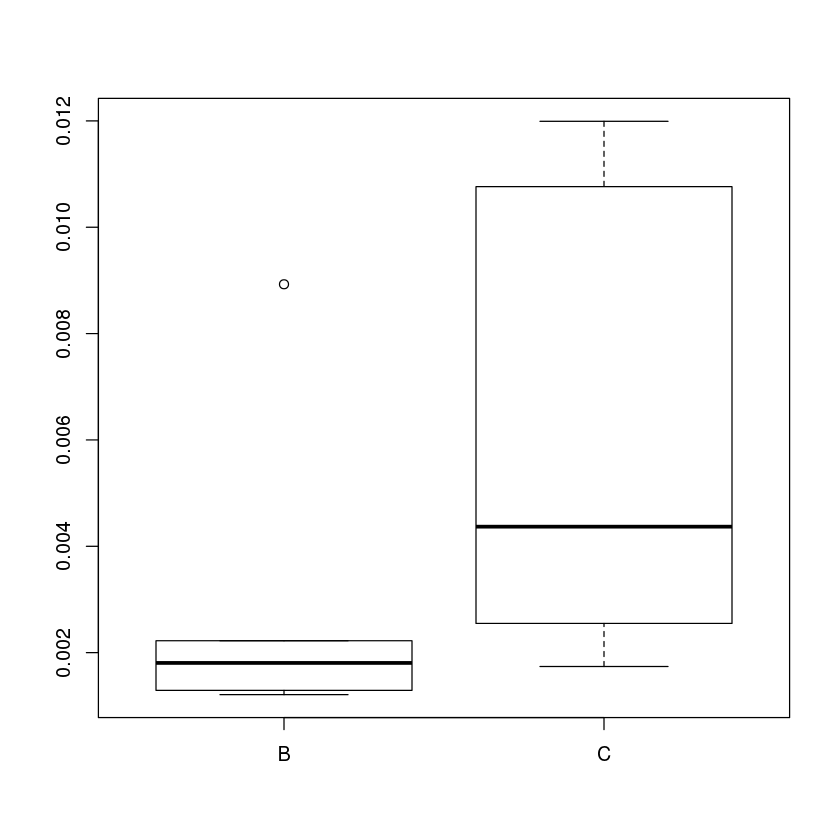

In [16]:
#boxplot
boxplot(normal~nxf1)
#normality test for each population
shapiro.test(normal[nxf1=='B'])
shapiro.test(normal[nxf1=='C'])
#determining the variances of each population
var.test(normal~nxf1)
# t test
#null hypothesis: u=u0 --> B = C
#alternative hypothesis: u<u0, u-u0<0 --> B-C<0   0<u0-u  
t.test(normal~nxf1, alternative =c("less"), paired = FALSE)
wilcox.test(normal~nxf1, alternative =c("less"), paired = FALSE)

From this test, assuming we reject the null hypothesis at a p-value of 0.05, there is not enough evidence that would allow us to make the conclusion that the means are significantly different from the t test. Therefore, with a p-value of 0.09477, we fail to reject the null hypthesis and conclude that the two two alleles do not have statistically different expression levels. However, the Mann-Whitney test has a p-value of 0.3247. This is a little iffy, so I wouldn't necessarily think that this data is a good representation of the two populations.

#### 3. What test statistic(s) would be most appropriate to compare data in F2.txt?  Perform the test in R. (For this exercise, you may either exclude the heterozygous individual, EB216, or treat as if C; extra credit–does this sample matter to your overall conclusion?)

*Notes: usage of “less” or “greater” for direction of the test has opposite meaning in the two tests; see Details in the help page for each test: >?ks.test and >?wilcox.test.  The ks.test does not allow conditional calls to normal.f2~nxf1.f2*

In [4]:
F2<-read.table("adamts_balbF2.txt",header=T)
F2
attach(F2)

,id.f2,nxf1.f2,raw.f2,normal.f2,cohort.f2
1,EB026,B,7e-05,0.000740424,4/3/09
2,EB211,B,0.00012,0.001157392,4/3/09
3,EB030,B,0.00014,0.001380945,4/3/09
4,EB034,B,0.00022,0.002208735,4/3/09
5,EB319,B,0.00091,0.009084916,4/3/09
6,EB189,B,0.00213,0.001081516,4/15/09
7,EB237,B,0.0031,0.001573233,4/15/09
8,EB279,B,0.00349,0.001772814,4/15/09
9,EB222,B,0.00372,0.001890922,4/15/09
10,EB342,B,0.00214,0.001334754,4/16/09



	Shapiro-Wilk normality test

data:  normal.f2[nxf1.f2 == "B"]
W = 0.70643, p-value = 9.494e-05



	Shapiro-Wilk normality test

data:  normal.f2[nxf1.f2 == "C"]
W = 0.62012, p-value = 0.0001587



	F test to compare two variances

data:  normal.f2[1:30] by nxf1.f2[1:30]
F = 0.15002, num df = 17, denom df = 11, p-value = 0.0005963
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.04571359 0.43049035
sample estimates:
ratio of variances 
         0.1500155 


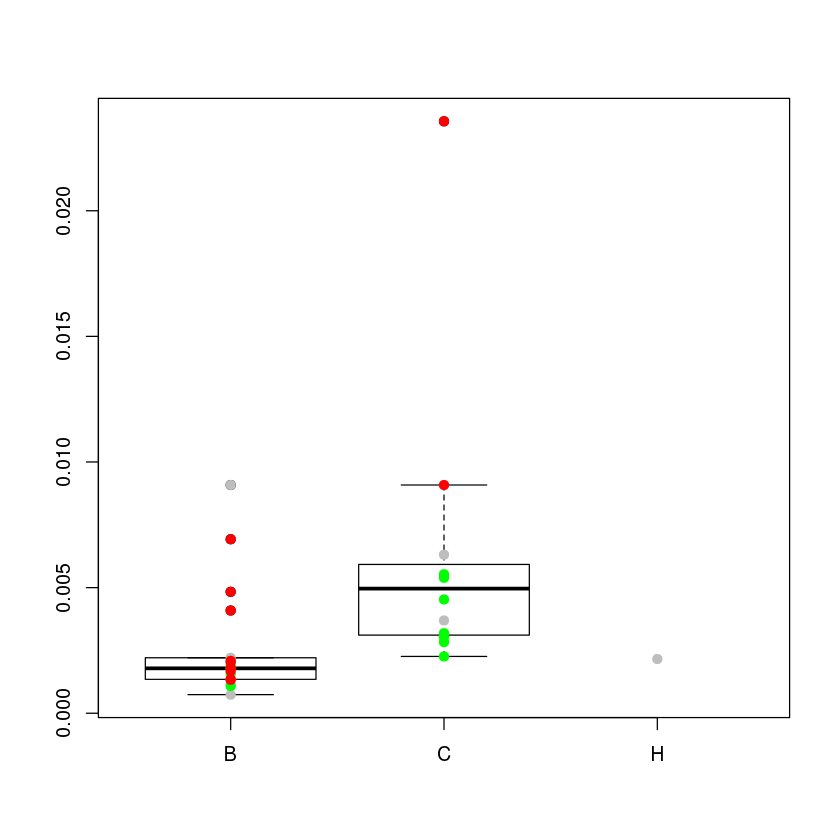

In [5]:
#Test for normality
shapiro.test(normal.f2[nxf1.f2=='B'])
shapiro.test(normal.f2[nxf1.f2=='C'])
var.test(normal.f2[1:30]~nxf1.f2[1:30])
##boxplot of all the data excpet the heterozygote
boxplot(normal.f2[1:30]~nxf1.f2[1:30])
points(normal.f2[cohort.f2=='4/3/09']~nxf1.f2[cohort.f2=='4/3/09'],pch=19,col="grey")
points(normal.f2[cohort.f2=='4/15/09']~nxf1.f2[cohort.f2=='4/15/09'],pch=19,col="green")
points(normal.f2[cohort.f2=='4/16/09']~nxf1.f2[cohort.f2=='4/16/09'],pch=19,col="red")

In this dataset, first, due to the presence of an obvious outlier, we cannot asumme that this data is normally distributed. Additionally, the number of observations for each allele is not equal, so we cannot asumme equal variances either. Therefore, a non-parametric test statistic must be used. I will use the Mann-Whitney test which is the appropriate test to compare the sample means, for reasons as explained above. There are subsets of each allele from different cohorts for which I have included in the box plot. However, the points seem to be going in the same direction, so I will treat all samples a pooled population for each allele.

In [6]:
#Treating heterozygous as "C"
F2_treatC<-read.table("adamts_balbF2_treatC.txt", header=T)
F2_treatC
attach(F2_treatC)


,id.f2_treatC,nxf1.f2_treatC,raw.f2_treatC,normal.f2_treatC,cohort.f2_treatC
1,EB026,B,7e-05,0.000740424,4/3/09
2,EB211,B,0.00012,0.001157392,4/3/09
3,EB030,B,0.00014,0.001380945,4/3/09
4,EB034,B,0.00022,0.002208735,4/3/09
5,EB319,B,0.00091,0.009084916,4/3/09
6,EB189,B,0.00213,0.001081516,4/15/09
7,EB237,B,0.0031,0.001573233,4/15/09
8,EB279,B,0.00349,0.001772814,4/15/09
9,EB222,B,0.00372,0.001890922,4/15/09
10,EB342,B,0.00214,0.001334754,4/16/09


In [18]:
##Wilcox/Mann-Whitney test
wilcox.test(normal.f2_treatC~nxf1.f2_treatC, alternative = c("less"), paired = FALSE)


	Wilcoxon rank sum test

data:  normal.f2_treatC by nxf1.f2_treatC
W = 37, p-value = 0.0004375
alternative hypothesis: true location shift is less than 0


In [8]:
F2_rm<-read.table("adamts_balbF2_rm.txt", header=T)
F2_rm
attach(F2_rm)

,id.f2_rm,nxf1.f2_rm,raw.f2_rm,normal.f2_rm,cohort.f2_rm
1,EB026,B,7e-05,0.000740424,4/3/09
2,EB211,B,0.00012,0.001157392,4/3/09
3,EB030,B,0.00014,0.001380945,4/3/09
4,EB034,B,0.00022,0.002208735,4/3/09
5,EB319,B,0.00091,0.009084916,4/3/09
6,EB189,B,0.00213,0.001081516,4/15/09
7,EB237,B,0.0031,0.001573233,4/15/09
8,EB279,B,0.00349,0.001772814,4/15/09
9,EB222,B,0.00372,0.001890922,4/15/09
10,EB342,B,0.00214,0.001334754,4/16/09


In [9]:
wilcox.test(normal.f2_rm~nxf1.f2_rm, alternative = c("less"), paired = FALSE)


	Wilcoxon rank sum test

data:  normal.f2_rm by nxf1.f2_rm
W = 32, p-value = 0.0003972
alternative hypothesis: true location shift is less than 0


In both cases - including the heterozygous outlier and exlucding it - we get p-values that allow rejection of the null hypothesis and we can conclude that the sample means for alleles "B" and "C" are statistically different.

#### 4. What do you conclude about the influence of Nxf1 on gene 8?  How strong is the evidence overall?

I would conclude that in gene 8 is Nxf1 dependent in the "C" allele. Although we failed to reject the null hypothesis in the first dataset using a t test, the p-value was fairly low and it was close enough to go either way as we saw when performing the Mann-Whitney test. In addion, it is important to take into consideration that there were only 6 observations per allele in the first data set. Had there been a higher value of n, the t test may have provided more significant results. In the second dataset, there were many more observations which drove the p-value way down. Here we reject the null hypothesis and conclude that the mean expression levels of alelle "C" is significantly higher than that of allele "B".

#### 5. Are parametric or non-parametric test more sensitive to outliers values?

Parametric tests are more sensitive to outliers because we have the "normal distribution" and "equal variance" assumptions. This is because non-parametric tests use other measures of central tendancy to represent the data. For example, in this dataset with the heterzygous outlier, the median is a much better measure than the mean since the median will not be as affected by outliers. Therefore, the median will more closely reflect the center of the distribution.

* * *

## Some helpful bits of R.

#### Creates an object “b6” that holds the data table in b6.txt.

In [10]:
b6<-read.table("hot.txt",header=T)

#### Allows R to call a column of data according to its header.

In [11]:
attach(b6)

#### Calls up the documentation page for the t-test implementation, including expected or allowable arguments, which may define the version of the test that is run (paired, unpaired, 2-tailed, alternative directions for 1-tailed, etc.).

In [12]:
?t.test

t.test {stats},R Documentation
x,a (non-empty) numeric vector of data values.
y,an optional (non-empty) numeric vector of data values.
alternative,"a character string specifying the alternative hypothesis, must be one of ""two.sided"" (default), ""greater"" or ""less"". You can specify just the initial letter."
mu,a number indicating the true value of the mean (or difference in means if you are performing a two sample test).
paired,a logical indicating whether you want a paired t-test.
var.equal,a logical variable indicating whether to treat the two variances as being equal. If TRUE then the pooled variance is used to estimate the variance otherwise the Welch (or Satterthwaite) approximation to the degrees of freedom is used.
conf.level,confidence level of the interval.
formula,a formula of the form lhs ~ rhs where lhs is a numeric variable giving the data values and rhs a factor with two levels giving the corresponding groups.
data,an optional matrix or data frame (or similar: see model.frame) containing the variables in the formula formula. By default the variables are taken from environment(formula).
subset,an optional vector specifying a subset of observations to be used.


#### Calls up the documentation page for the non-parametric tests, including the Wilcoxon rank sum (a.k.a. Mann-Whitney, unpaired samples including unequal numbers) and Wilcoxon signed rank (paired samples, must be equal numbers)

In [13]:
?wilcox.test

wilcox.test {stats},R Documentation
x,"numeric vector of data values. Non-finite (e.g., infinite or missing) values will be omitted."
y,an optional numeric vector of data values: as with x non-finite values will be omitted.
alternative,"a character string specifying the alternative hypothesis, must be one of ""two.sided"" (default), ""greater"" or ""less"". You can specify just the initial letter."
mu,a number specifying an optional parameter used to form the null hypothesis. See ‘Details’.
paired,a logical indicating whether you want a paired test.
exact,a logical indicating whether an exact p-value should be computed.
correct,a logical indicating whether to apply continuity correction in the normal approximation for the p-value.
conf.int,a logical indicating whether a confidence interval should be computed.
conf.level,confidence level of the interval.
formula,a formula of the form lhs ~ rhs where lhs is a numeric variable giving the data values and rhs a factor with two levels giving the corresponding groups.


#### Calls only the values of “stuff” from rows 1-6 of the data table.

In [14]:
lukewarm[1:6]

[1] 0.4202 0.4718 0.5351 0.4955 0.4299 0.5609

#### As an argument to plot sets the range of y to values of 0-5.

In [15]:
ylim=c(0,5) 

* * *

([Return to top.](#Module-3-:-Homework))

* * *